In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


pic/c.jpg


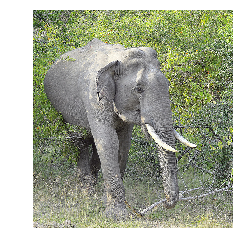

tusker (score = 0.81418)
Indian elephant, Elephas maximus (score = 0.13023)
African elephant, Loxodonta africana (score = 0.03538)
chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour (score = 0.00042)
Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis (score = 0.00012)

pic/3.jpg


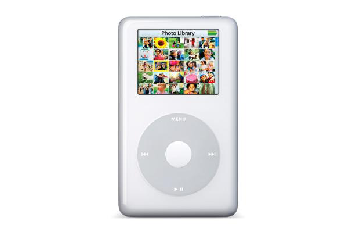

iPod (score = 0.98114)
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system (score = 0.00133)
remote control, remote (score = 0.00093)
hourglass (score = 0.00024)
radio, wireless (score = 0.00023)

pic/1.jpg


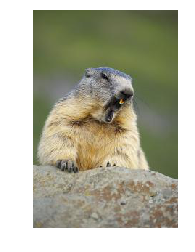

marmot (score = 0.84679)
beaver (score = 0.00334)
fox squirrel, eastern fox squirrel, Sciurus niger (score = 0.00213)
mink (score = 0.00092)
thunder snake, worm snake, Carphophis amoenus (score = 0.00072)

pic/0.jpg


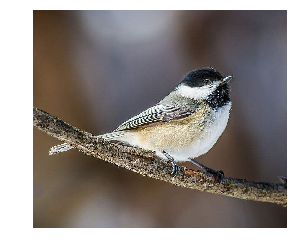

chickadee (score = 0.90536)
junco, snowbird (score = 0.00076)
brambling, Fringilla montifringilla (score = 0.00064)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus (score = 0.00037)
cocker spaniel, English cocker spaniel, cocker (score = 0.00037)

pic/8.jpg


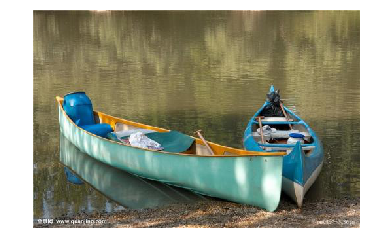

canoe (score = 0.97904)
gondola (score = 0.00281)
paddle, boat paddle (score = 0.00104)
boathouse (score = 0.00024)
earthstar (score = 0.00023)

pic/4.jpg


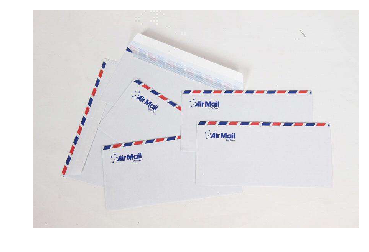

envelope (score = 0.99897)
handkerchief, hankie, hanky, hankey (score = 0.00008)
web site, website, internet site, site (score = 0.00007)
packet (score = 0.00007)
rule, ruler (score = 0.00007)

pic/6.jpg


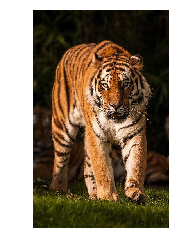

tiger, Panthera tigris (score = 0.83838)
tiger cat (score = 0.08538)
jaguar, panther, Panthera onca, Felis onca (score = 0.00142)
zebra (score = 0.00089)
leopard, Panthera pardus (score = 0.00060)

pic/honglvdeng.jpg


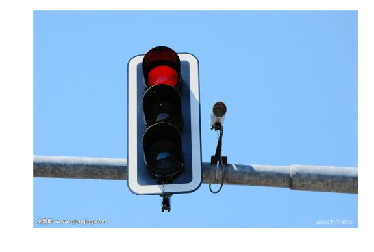

traffic light, traffic signal, stoplight (score = 0.99483)
switch, electric switch, electrical switch (score = 0.00009)
loudspeaker, speaker, speaker unit, loudspeaker system, speaker system (score = 0.00009)
hook, claw (score = 0.00008)
street sign (score = 0.00007)

pic/xiangrikui.jpg


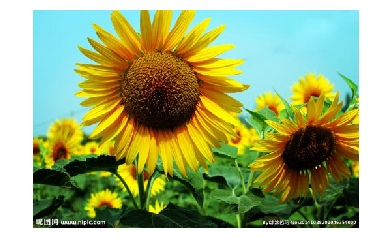

daisy (score = 0.96660)
bee (score = 0.00790)
fly (score = 0.00196)
vase (score = 0.00053)
sulphur butterfly, sulfur butterfly (score = 0.00046)

pic/d.jpg


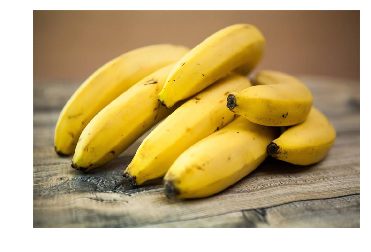

banana (score = 0.99866)
spaghetti squash (score = 0.00004)
orange (score = 0.00002)
lakeside, lakeshore (score = 0.00002)
pineapple, ananas (score = 0.00002)

pic/2.jpg


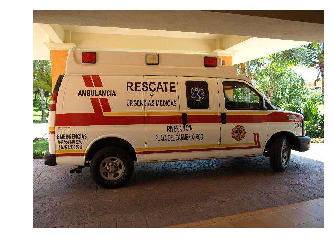

ambulance (score = 0.97911)
stretcher (score = 0.00066)
cock (score = 0.00051)
hen (score = 0.00049)
police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria (score = 0.00044)

pic/sun.jpg


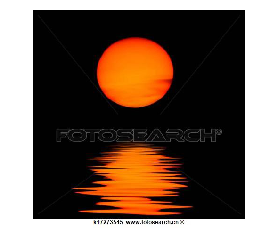

ping-pong ball (score = 0.90955)
tennis ball (score = 0.04812)
balloon (score = 0.02246)
spotlight, spot (score = 0.00200)
pick, plectrum, plectron (score = 0.00079)

pic/b.jpg


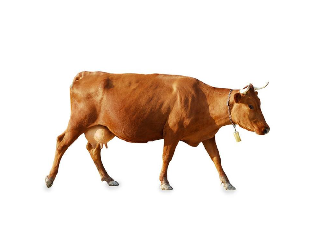

ox (score = 0.92716)
oxcart (score = 0.03316)
water buffalo, water ox, Asiatic buffalo, Bubalus bubalis (score = 0.00342)
hartebeest (score = 0.00190)
plow, plough (score = 0.00149)

pic/a.jpg


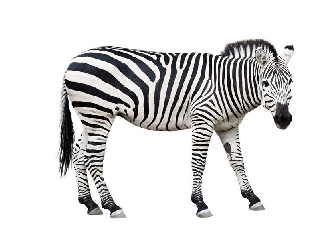

zebra (score = 0.95591)
cheetah, chetah, Acinonyx jubatus (score = 0.00057)
ostrich, Struthio camelus (score = 0.00053)
tiger, Panthera tigris (score = 0.00043)
hartebeest (score = 0.00039)

pic/shayu.jpeg


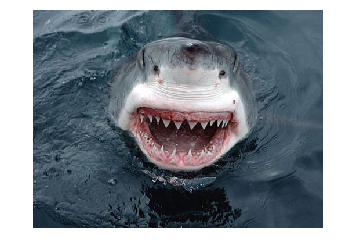

great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias (score = 0.89662)
tiger shark, Galeocerdo cuvieri (score = 0.00998)
killer whale, killer, orca, grampus, sea wolf, Orcinus orca (score = 0.00284)
albatross, mollymawk (score = 0.00069)
trifle (score = 0.00063)

pic/7.jpg


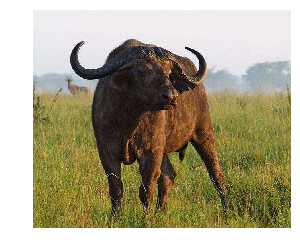

water buffalo, water ox, Asiatic buffalo, Bubalus bubalis (score = 0.95939)
ox (score = 0.00638)
oxcart (score = 0.00108)
bison (score = 0.00061)
plow, plough (score = 0.00042)

pic/9.jpg


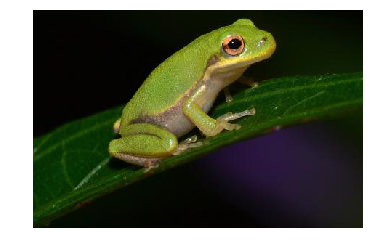

tree frog, tree-frog (score = 0.90958)
tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui (score = 0.03981)
bullfrog, Rana catesbeiana (score = 0.00073)
joystick (score = 0.00034)
European fire salamander, Salamandra salamandra (score = 0.00028)

pic/5.jpg


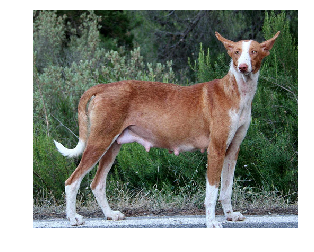

Ibizan hound, Ibizan Podenco (score = 0.96454)
basenji (score = 0.00141)
whippet (score = 0.00134)
Saluki, gazelle hound (score = 0.00123)
dingo, warrigal, warragal, Canis dingo (score = 0.00114)



In [14]:
class NodeLookup(object):
    def __init__(self):
        label_lookup_path = 'model/inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'   
        uid_lookup_path = 'model/inception_model/imagenet_synset_to_human_label_map.txt'
        self.node_lookup = self.load(label_lookup_path,uid_lookup_path)
    #建立模型输出与识别结果的连接
    def load(self,label_lookup_path, uid_lookup_path):
        proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
        uid_to_human = {}
        
        for line in proto_as_ascii_lines:
            line = line.strip('\n')
            parsed_items = line.split('\t')
            uid = parsed_items[0]
            human_string = parsed_items[1]
            
            uid_to_human[uid] = human_string
        #print(uid_to_human)    
        proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
        node_id_to_uid = {}
        
        for line in proto_as_ascii:
            if line.startswith('  target_class:'):
                target_class = int(line.split(': ')[1])
            if line.startswith('  target_class_string:'):
                target_class_string = line.split(': ')[1]
                
                node_id_to_uid[target_class] = target_class_string[1:-2]
        #print(node_id_to_uid)
        
        node_id_to_name = {}
        for key,val in node_id_to_uid.items():
            name = uid_to_human[val]
            node_id_to_name[key] = name
        #print(node_id_to_name)
        return node_id_to_name
    
    def id_to_string(self,node_id):
        if node_id not in self.node_lookup:
            return ''
        return self.node_lookup[node_id]
    
#创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('model/inception_model/classify_image_graph_def.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')
    
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    
    for root,dirs,files in os.walk('pic/'):
        for file in files:
            
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据
            
            image_path = os.path.join(root,file)
            print(image_path)
            img = Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
            top_k = predictions.argsort()[-5:][::-1]
            node_lookup = NodeLookup()
            
            for node_id in top_k:
                human_string = node_lookup.id_to_string(node_id)
                #print(node_id)
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string,score))
            print()